In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize']=(6,6)
#plt.rcParams['font.weight']='bold'
#plt.rcParams['axes.labelweight']='bold'
#plt.rcParams['lines.linewidth']=1.5
#plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

sys.path.append('/Applications/OpenFUSIONToolkit/python')
from OpenFUSIONToolkit.TokaMaker import TokaMaker
from OpenFUSIONToolkit.TokaMaker.meshing import load_gs_mesh
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

from omfit_classes.omfit_eqdsk import boundaryShape

In [2]:
mygs = TokaMaker()
mesh_pts,mesh_lc,mesh_reg,coil_dict,cond_dict = load_gs_mesh('nextstep_mesh_0801.h5')
mygs.setup_mesh(mesh_pts, mesh_lc, mesh_reg)
mygs.setup_regions(cond_dict=cond_dict,coil_dict=coil_dict)
mygs.setup(order=2,F0=1*3)

coil_reg_mat = np.zeros((mygs.ncoils+1,mygs.ncoils+1), dtype=np.float64)
targets = np.zeros(mygs.ncoils+1)
coil_weights = 0.5*np.ones(mygs.ncoils+1)

#Constrain CS current
coil_reg_mat[0,0] = 1
coil_reg_mat[1,1] = 1
coil_reg_mat[1,0] = -1
coil_reg_mat[2,2] = 1
coil_reg_mat[2,1] = -1

targets[0] = -3E6

coil_weights[:3] = 5

#Enforce up/down symmetry in PF coils
coil_reg_mat[3,3] = 1
coil_reg_mat[3,7] = -1
coil_reg_mat[4,4] = 1
coil_reg_mat[4,8] = -1
coil_reg_mat[5,5] = 1
coil_reg_mat[5,9] = -1
coil_reg_mat[6,6] = 1
coil_reg_mat[6,10] = -1

mygs.set_coil_reg(coil_reg_mat, targets, coil_weights)

#Set upper bound on coil currents
coil_bounds = np.zeros((mygs.ncoils+1,2), dtype=np.float64)
coil_bounds[:,0] = -1.E11; coil_bounds[:,1] = 1.E11

#Set upper bounds on divertor coils
coil_bounds[-3:-1, 0] = -122448.979592
coil_bounds[-3:-1, 1] = 122448.979592

mygs.set_coil_bounds(coil_bounds)

# Define shape of P' anf FF' profiles
n_sample = 40
psi_sample = np.linspace(0.0,1.0,n_sample)
# Set F*F' profile
alpha = 2
gamma = 1.25
ffp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
ffp_prof['y'] /= ffp_prof['y'][0] # Normalize profile (not required but convienient)
# Set P' profile
alpha = 2
gamma = 1.25
pp_prof = {
    'type': 'linterp',
    'x': psi_sample,
    'y': np.power(1.0-np.power(psi_sample,alpha),gamma)
}
pp_prof['y'] /= pp_prof['y'][0] # Normalize profile (not required but convienient)

mygs.set_profiles(ffp_prof=ffp_prof,pp_prof=pp_prof)

# set global targets
Ip_target = 0.75E6
mygs.set_targets(Ip = Ip_target, Ip_ratio=1.0)

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          aba6d8f
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  6.143E+00
    # of points  =   10020
    # of edges   =   29927
    # of cells   =   19908
    # of boundary points =     130
    # of boundary edges  =     130
    # of boundary cells  =     130
  Resolution statistics:
    hmin =  3.000E-03
    hrms =  2.845E-02
    hmax =  1.1

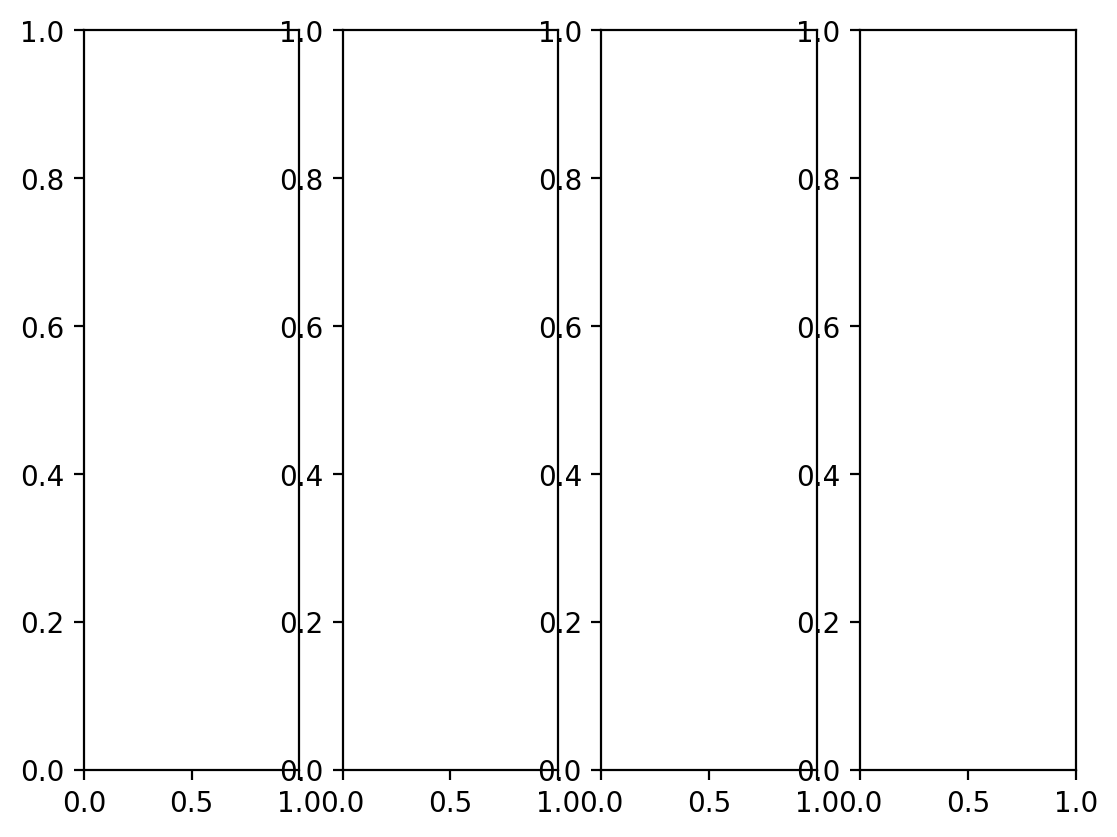

In [3]:
fig, ax = plt.subplots(1,4)

In [4]:
colors = [ 'mediumvioletred','darkgoldenrod', 'teal']

points_l = np.array([[1.06, 0.55],[1.048, 0.51],[1.11, 0.505] ])
points_r = np.array([[1.255, 0.495],[1.18, 0.485], [1.25, 0.46]  ])

Starting non-linear GS solver
     1  6.2927E+00  3.0037E+00  5.4714E-03  1.0356E+00 -1.4315E-04 -0.0000E+00
     2  5.9720E+00  2.8591E+00  1.3837E-03  1.0367E+00 -1.2176E-04 -0.0000E+00
     3  5.8895E+00  2.8222E+00  3.4082E-04  1.0369E+00 -1.1091E-04 -0.0000E+00
     4  5.8615E+00  2.8097E+00  9.3812E-05  1.0370E+00 -1.0490E-04 -0.0000E+00
     5  5.8512E+00  2.8051E+00  3.1731E-05  1.0370E+00 -1.0159E-04 -0.0000E+00
     6  5.8473E+00  2.8033E+00  1.3049E-05  1.0370E+00 -9.9771E-05 -0.0000E+00
     7  5.8458E+00  2.8026E+00  5.8559E-06  1.0370E+00 -9.8801E-05 -0.0000E+00
     8  5.8451E+00  2.8023E+00  2.6739E-06  1.0370E+00 -9.8291E-05 -0.0000E+00
     9  5.8449E+00  2.8022E+00  1.2150E-06  1.0370E+00 -9.8027E-05 -0.0000E+00
    10  5.8448E+00  2.8021E+00  5.4722E-07  1.0370E+00 -9.7893E-05 -0.0000E+00
 Timing:  0.17231999989598989     
   Source:     5.7389999739825726E-002
   Solve:      7.3247000109404325E-002
   Boundary:   5.0069997087121010E-003
   Other:      3.66760003380

IndexError: index 13 is out of bounds for axis 0 with size 13

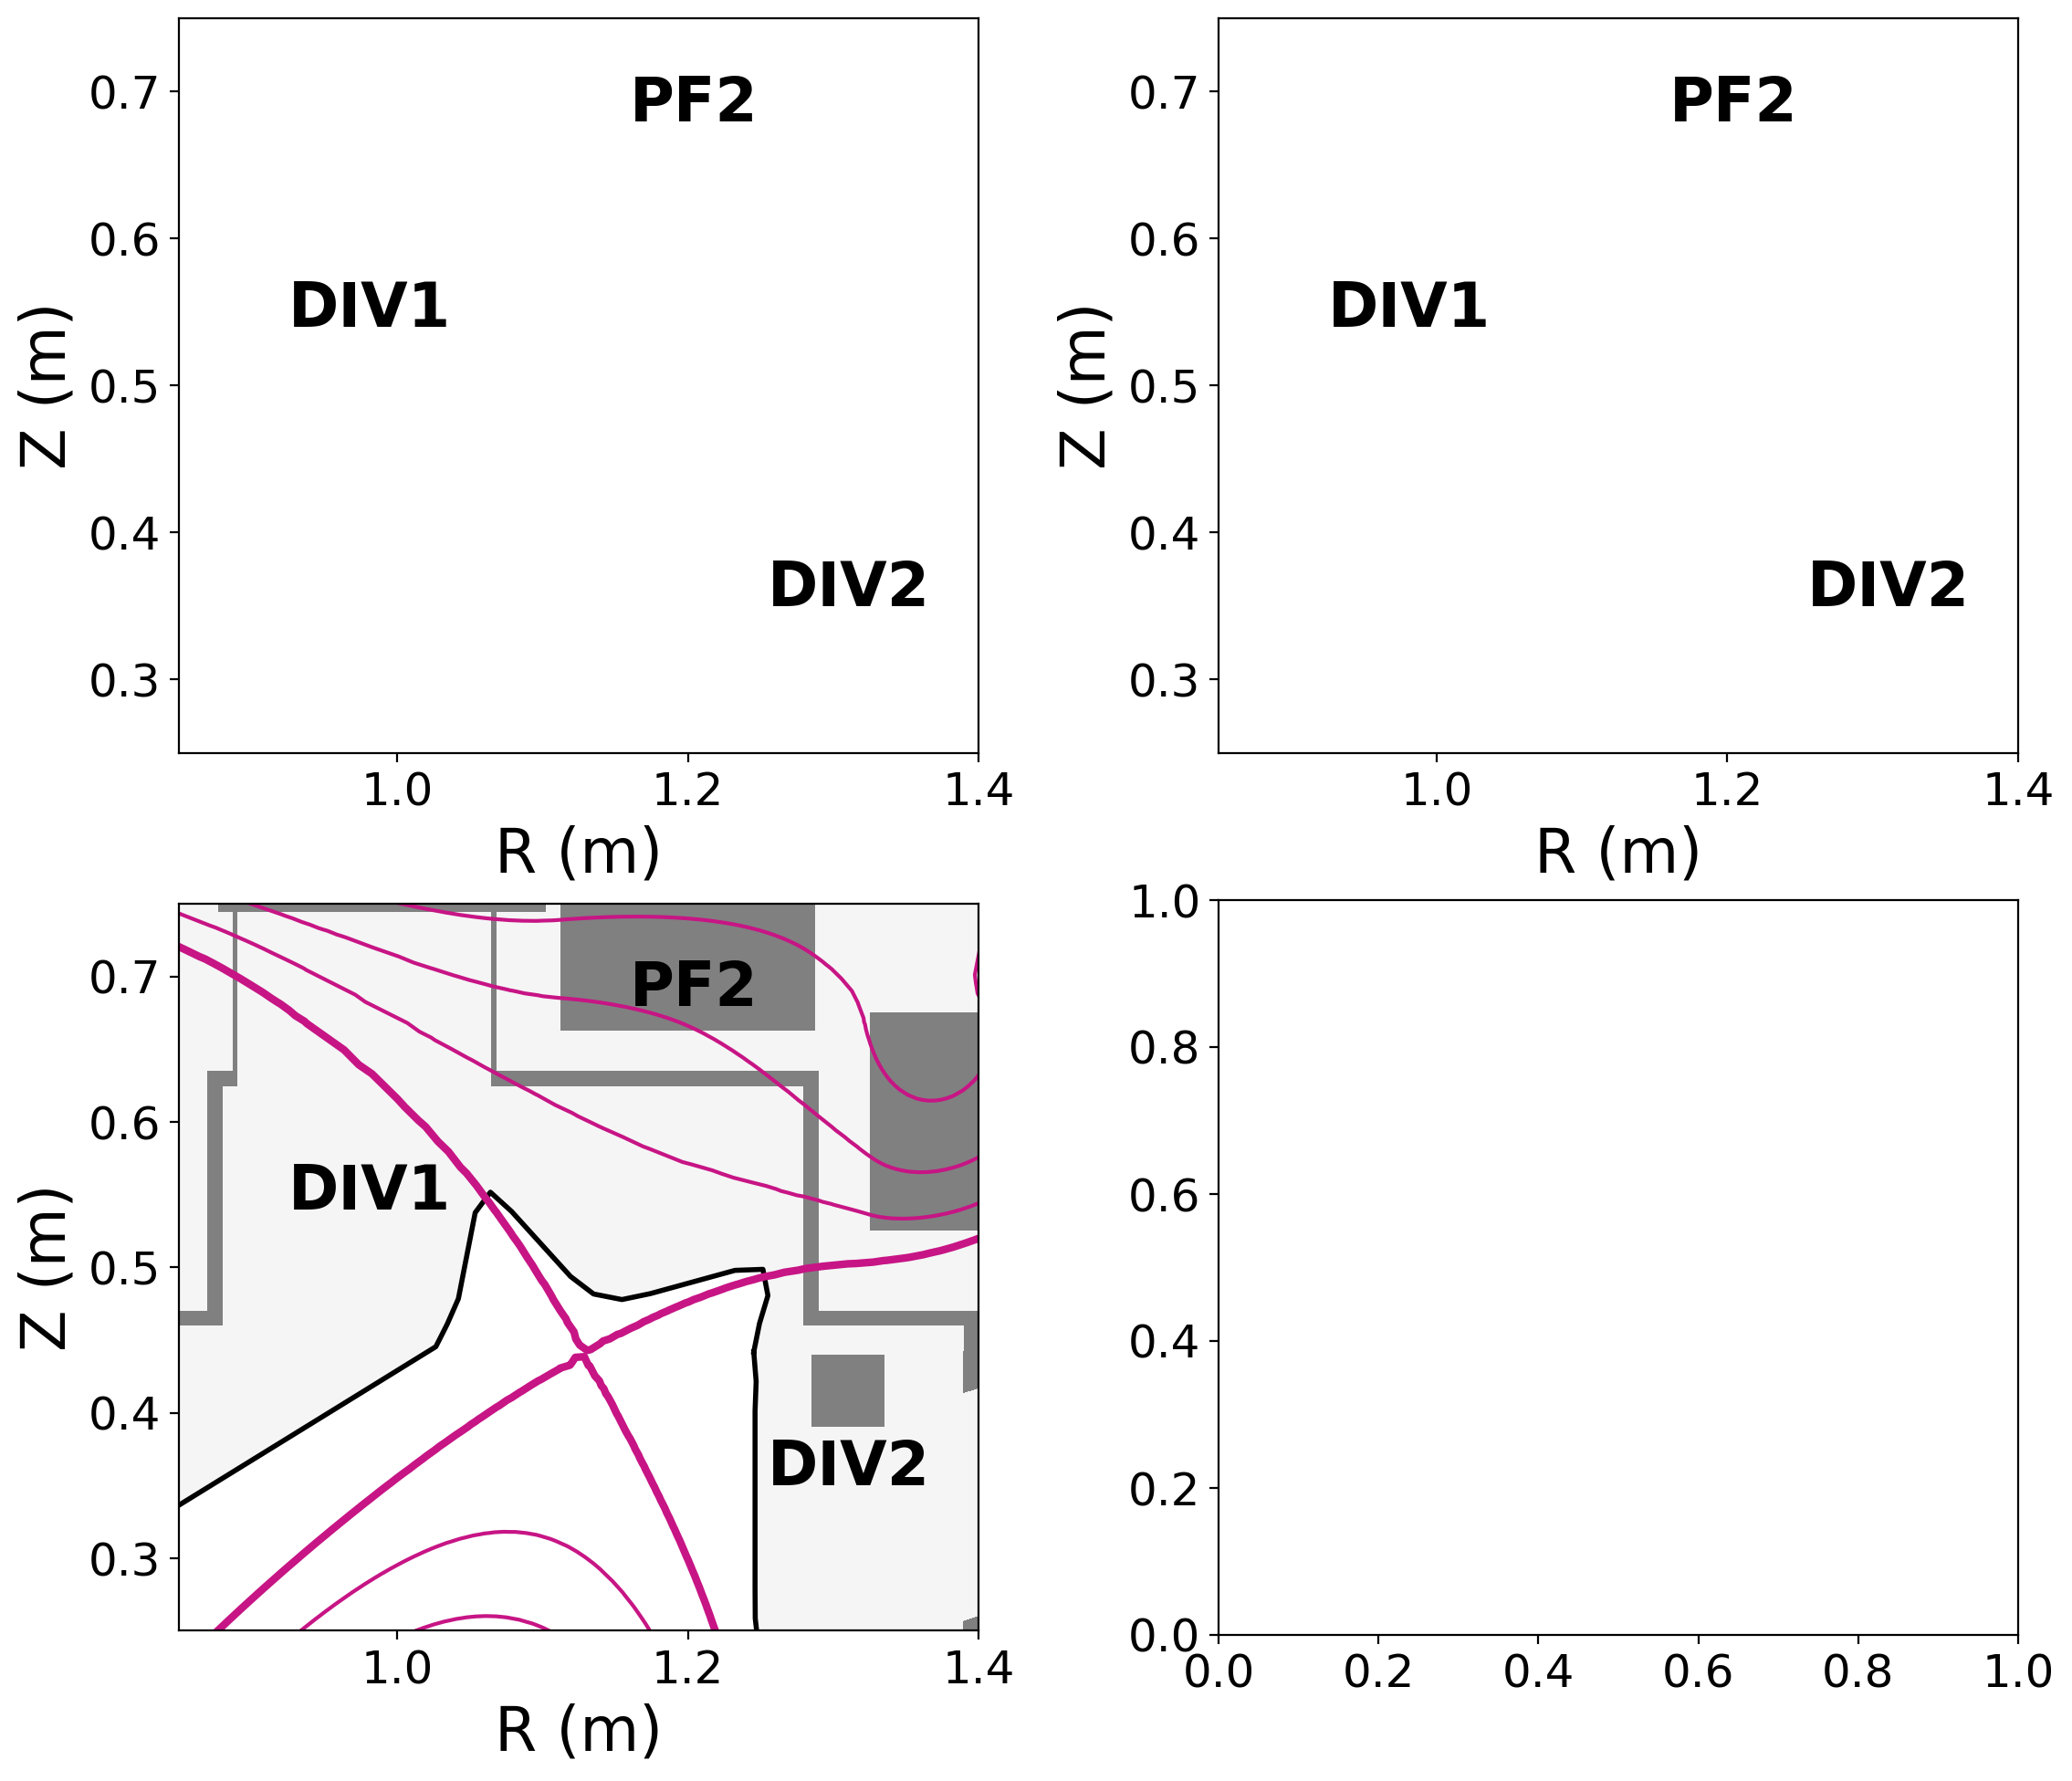

In [5]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(2, 2, width_ratios=[1, 1],height_ratios=[1, 1],hspace = 0.2, wspace = .3)

fig = plt.figure(figsize = (13,11.5))
ax[0] = fig.add_subplot(gs[2])
ax[1] = fig.add_subplot(gs[1])
ax[2] = fig.add_subplot(gs[0])
ax[3] = fig.add_subplot(gs[3])

for a in ax:    
    a.tick_params(axis='x', labelsize=18)
    a.tick_params(axis='y', labelsize=18)

plt.rcParams['lines.linewidth']=2
ax[0].set_ylabel('Z (m)', fontsize = 24)
ax[0].set_xlabel('R (m)', fontsize = 24)
ax[2].set_ylabel('Z (m)', fontsize = 24)
ax[1].set_xlabel('R (m)', fontsize = 24)
ax[1].set_ylabel('Z (m)', fontsize = 24)
ax[2].set_xlabel('R (m)', fontsize = 24)
for a in ax[:-1]:
    a.set_xlim([0.85,1.4])
    a.set_ylim([0.25, 0.75])
    a.set_xticks([1, 1.2, 1.4])
    a.text(0.925, 0.54, 'DIV1', color = 'k', fontsize = 24, fontweight = 'bold')
    a.text(1.16, 0.68, 'PF2', color = 'k', fontsize = 24, fontweight = 'bold')
    a.text(1.255, 0.35, 'DIV2', color = 'k', fontsize = 24, fontweight = 'bold')
    #a.text(1.23, 0.56, 'PF3', color = 'k', fontsize = 24, fontweight = 'bold')

for i in range(3):
    d0 = -0.5
    d1 = -0.5
    if d1<d0:
        r, z, zeff = boundaryShape(kapu = 1.7*(1-d1)/(1-d0), kapl = 1.7*(1-d1)/(1-d0), delu = d1, dell = d1, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588*(1-d0)/(1-d1), eps = 0.2588*(1-d0)/(1-d1)/(1+0.2588*((1-d0)/(1-d1)-1)), zoffset = 0, upnull = True, lonull = True, npts = 4)
    else:
        r, z, zeff = boundaryShape(kapu = 1.7*(1+d1)/(1+d0), kapl = 1.7*(1+d1)/(1+d0), delu = d1, dell = d1, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588*(1+d0)/(1+d1), eps = 0.2588*(1+d0)/(1+d1)/(1+0.2588*(1-(1+d0)/(1+d1))), zoffset = 0, upnull = True, lonull = True, npts = 4)
    
    boundary = np.column_stack((r,z))
    boundary = np.nan_to_num(boundary)
    #boundary = create_isoflux(8,1,0.0,0.2588,1.7,-0.5)
    x_points = np.zeros((2,2))
    x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
    x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
    x_weights = 50*np.ones(2)
    mygs.set_saddles(x_points, x_weights)

    p1 = points_l[i]
    p2 = points_r[i]

    p1_l = np.copy(p1)
    p1_l[1] = -p1[1]
    p2_l = np.copy(p2)
    p2_l[1] = -p2[1]

    boundary = np.vstack((boundary, p1, p2,p1_l, p2_l))

    isoflux_weights = 50*np.ones(len(boundary))
    isoflux_weights[-4:] = 200

    mygs.set_isoflux(boundary, isoflux_weights)

    mygs.init_psi(0.68,0,0.2, 1.8,0.3)
    mygs.settings.maxits = 100
    mygs.update_settings()
    mygs.solve()
    mygs.plot_machine(fig,ax[i])
    plt.rcParams['lines.linewidth']=1.5
    mygs.plot_psi(fig, ax[i], plasma_nlevels = 6, vacuum_nlevels = 4, xpoint_color = None, xpoint_marker = None, plasma_color = colors[i])
    plt.rcParams['lines.linewidth']=3
    mygs.plot_psi(fig, ax[i], plasma_nlevels = 1, vacuum_nlevels = 0, xpoint_color = None, xpoint_marker = None, plasma_color = colors[i])
    #mygs.print_info()

    currents, map = mygs.get_coil_currents()
    curr_array = np.array([currents[3], currents[5], currents[7], currents[9],currents[11], currents[13]])
    pfs = np.array(['PF1', 'PF2', 'PF3', 'PF4', 'DIV1', 'DIV2'])
    plt.rcParams['lines.linewidth']=2.4
    ax[3].plot(pfs, curr_array/1E6, color = colors[i])
    ax[3].scatter(pfs, curr_array/1E6, color = colors[i], s =70)

ax[3].grid()
ax[3].axhline(y =122448.979592/1E6 , color = 'k', linestyle = '--', label = "Divertor \ncoil limit") 
ax[3].axhline(y =-122448.979592/1E6 , color = 'k', linestyle = '--') 
ax[3].set_ylabel('Current (MA)', fontsize = 24)
ax[3].legend(fontsize = 18)

ax[3].text(4.66, -0.875,'(d)', fontsize = 24)
ax[1].text(1.34, 0.27,'(b)', fontsize = 24)
ax[0].text(1.34, 0.27,'(c)', fontsize = 24)
ax[2].text(1.34, 0.27,'(a)', fontsize = 24)



Starting non-linear GS solver
     1  6.2927E+00  3.0037E+00  5.4714E-03  1.0356E+00 -1.4315E-04 -0.0000E+00
     2  5.9720E+00  2.8591E+00  1.3837E-03  1.0367E+00 -1.2176E-04 -0.0000E+00
     3  5.8895E+00  2.8222E+00  3.4082E-04  1.0369E+00 -1.1091E-04 -0.0000E+00
     4  5.8615E+00  2.8097E+00  9.3812E-05  1.0370E+00 -1.0490E-04 -0.0000E+00
     5  5.8512E+00  2.8051E+00  3.1731E-05  1.0370E+00 -1.0159E-04 -0.0000E+00
     6  5.8473E+00  2.8033E+00  1.3049E-05  1.0370E+00 -9.9771E-05 -0.0000E+00
     7  5.8458E+00  2.8026E+00  5.8559E-06  1.0370E+00 -9.8801E-05 -0.0000E+00
     8  5.8451E+00  2.8023E+00  2.6739E-06  1.0370E+00 -9.8291E-05 -0.0000E+00
     9  5.8449E+00  2.8022E+00  1.2150E-06  1.0370E+00 -9.8027E-05 -0.0000E+00
    10  5.8448E+00  2.8021E+00  5.4722E-07  1.0370E+00 -9.7893E-05 -0.0000E+00
 Timing:   9.0118839996866882     
   Source:     2.9723830008879304     
   Solve:      3.7868370008654892     
   Boundary:  0.25515400478616357     
   Other:      1.99750999314

Starting non-linear GS solver
     1  6.5164E+00  3.0989E+00  8.6391E-03  1.0374E+00 -6.8640E-05 -0.0000E+00
     2  6.2403E+00  2.9699E+00  1.6476E-03  1.0384E+00 -5.9582E-05 -0.0000E+00
     3  6.1564E+00  2.9319E+00  3.6222E-04  1.0386E+00 -5.6841E-05 -0.0000E+00
     4  6.1261E+00  2.9181E+00  1.5239E-04  1.0387E+00 -5.5766E-05 -0.0000E+00
     5  6.1145E+00  2.9128E+00  7.3744E-05  1.0387E+00 -5.5383E-05 -0.0000E+00
     6  6.1100E+00  2.9107E+00  3.3704E-05  1.0387E+00 -5.5236E-05 -0.0000E+00
     7  6.1082E+00  2.9098E+00  1.4779E-05  1.0387E+00 -5.5176E-05 -0.0000E+00
     8  6.1075E+00  2.9095E+00  6.3431E-06  1.0387E+00 -5.5151E-05 -0.0000E+00
     9  6.1073E+00  2.9093E+00  2.6976E-06  1.0387E+00 -5.5141E-05 -0.0000E+00
    10  6.1071E+00  2.9093E+00  1.1454E-06  1.0387E+00 -5.5137E-05 -0.0000E+00
    11  6.1071E+00  2.9092E+00  4.8804E-07  1.0387E+00 -5.5135E-05 -0.0000E+00
 Timing:   9.1974699995480478     
   Source:     3.0328370002098382     
   Solve:      3.8672180012

Starting non-linear GS solver
     1  6.7199E+00  3.1437E+00  6.2601E-03  1.0401E+00 -5.5491E-05 -0.0000E+00
     2  6.2293E+00  2.9444E+00  1.8875E-03  1.0399E+00 -5.6342E-05 -0.0000E+00
     3  6.0654E+00  2.8800E+00  5.5189E-04  1.0394E+00 -5.9932E-05 -0.0000E+00
     4  6.0029E+00  2.8558E+00  1.8529E-04  1.0391E+00 -6.0845E-05 -0.0000E+00
     5  5.9783E+00  2.8465E+00  7.1000E-05  1.0389E+00 -6.0929E-05 -0.0000E+00
     6  5.9686E+00  2.8428E+00  2.9454E-05  1.0388E+00 -6.0787E-05 -0.0000E+00
     7  5.9647E+00  2.8414E+00  1.2645E-05  1.0388E+00 -6.0627E-05 -0.0000E+00
     8  5.9633E+00  2.8408E+00  5.4783E-06  1.0388E+00 -6.0506E-05 -0.0000E+00
     9  5.9627E+00  2.8406E+00  2.3683E-06  1.0388E+00 -6.0426E-05 -0.0000E+00
    10  5.9625E+00  2.8405E+00  1.0176E-06  1.0387E+00 -6.0377E-05 -0.0000E+00
    11  5.9624E+00  2.8405E+00  4.3440E-07  1.0387E+00 -6.0349E-05 -0.0000E+00
 Timing:   9.3873359994031489     
   Source:     3.0944529990665615     
   Solve:      3.9498800016

(-0.2, 4.3)

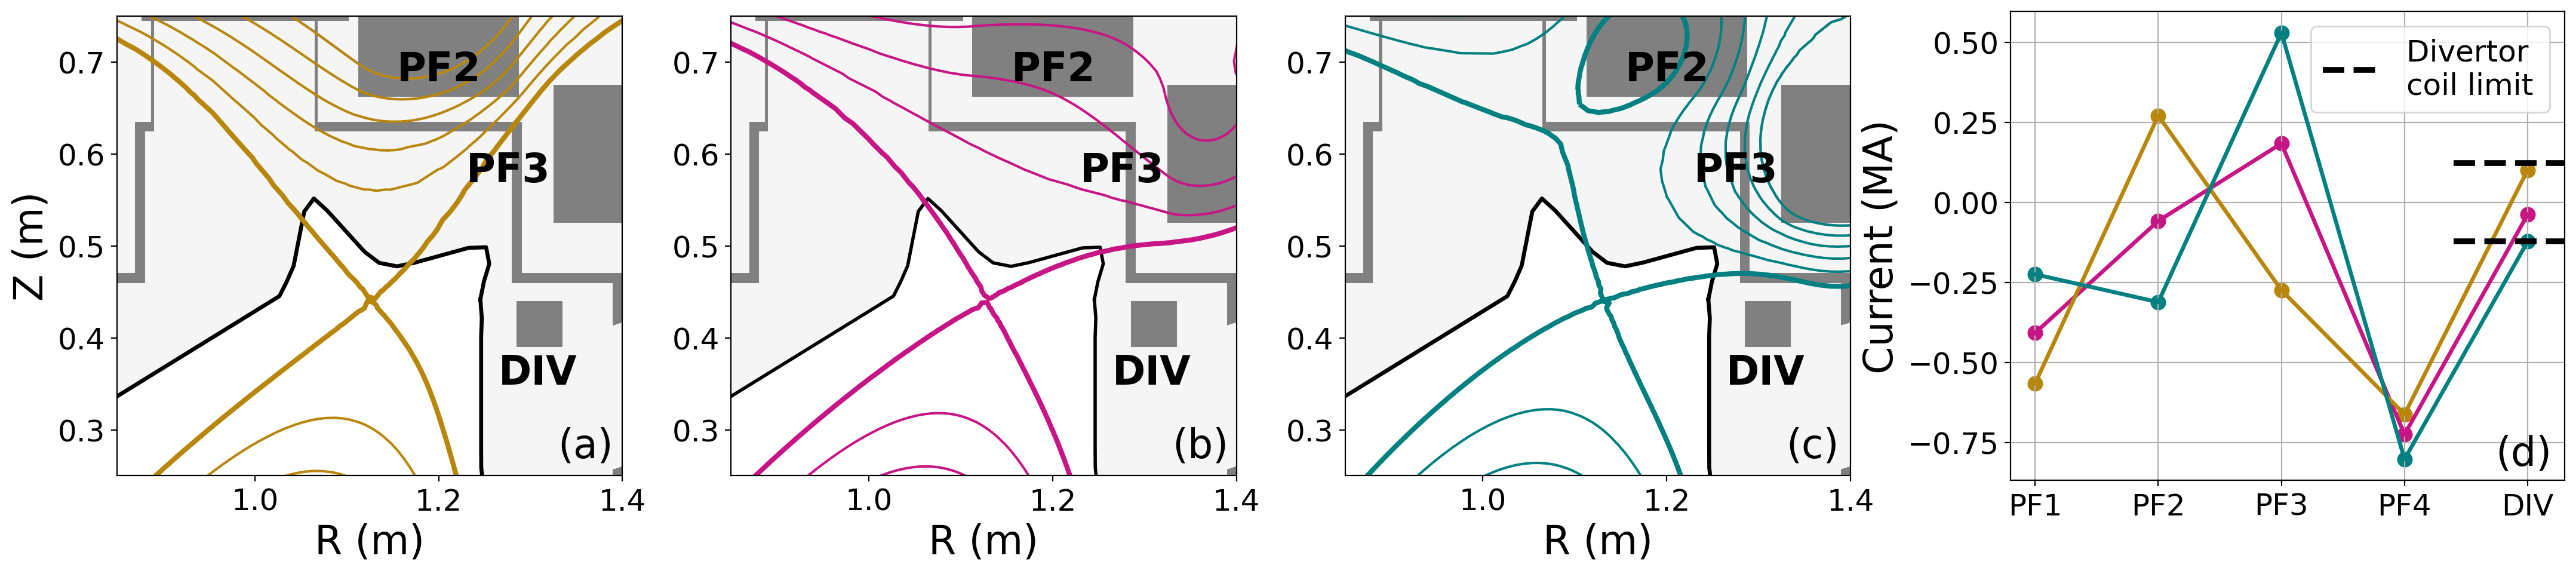

In [20]:
from matplotlib.gridspec import GridSpec

gs = GridSpec(1, 4, width_ratios=[1, 1,1,1.3])

fig = plt.figure(figsize = (27,5.1))
ax[0] = fig.add_subplot(gs[1])
ax[1] = fig.add_subplot(gs[0])
ax[2] = fig.add_subplot(gs[2])
ax[3] = fig.add_subplot(gs[3])
ax[3].set_aspect(aspect = 2.6)

for a in ax:    
    a.tick_params(axis='x', labelsize=18)
    a.tick_params(axis='y', labelsize=18)

plt.rcParams['lines.linewidth']=2
ax[0].set_xlabel('R (m)', fontsize = 24)
ax[1].set_xlabel('R (m)', fontsize = 24)
ax[1].set_ylabel('Z (m)', fontsize = 24)
ax[2].set_xlabel('R (m)', fontsize = 24)
for a in ax[:-1]:
    a.set_xlim([0.85,1.4])
    a.set_ylim([0.25, 0.75])
    a.set_xticks([1, 1.2, 1.4])
    #a.text(0.925, 0.54, 'DIV1', color = 'k', fontsize = 24, fontweight = 'bold')
    a.text(1.155, 0.68, 'PF2', color = 'k', fontsize = 24, fontweight = 'bold')
    a.text(1.265, 0.35, 'DIV', color = 'k', fontsize = 24, fontweight = 'bold')
    a.text(1.23, 0.57, 'PF3', color = 'k', fontsize = 24, fontweight = 'bold')

for i in range(3):
    d0 = -0.5
    d1 = -0.5
    if d1<d0:
        r, z, zeff = boundaryShape(kapu = 1.7*(1-d1)/(1-d0), kapl = 1.7*(1-d1)/(1-d0), delu = d1, dell = d1, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588*(1-d0)/(1-d1), eps = 0.2588*(1-d0)/(1-d1)/(1+0.2588*((1-d0)/(1-d1)-1)), zoffset = 0, upnull = True, lonull = True, npts = 4)
    else:
        r, z, zeff = boundaryShape(kapu = 1.7*(1+d1)/(1+d0), kapl = 1.7*(1+d1)/(1+d0), delu = d1, dell = d1, zetail = 0, zetaiu = 0, zetaou = 0, zetaol = 0, a = 0.2588*(1+d0)/(1+d1), eps = 0.2588*(1+d0)/(1+d1)/(1+0.2588*(1-(1+d0)/(1+d1))), zoffset = 0, upnull = True, lonull = True, npts = 4)
    
    boundary = np.column_stack((r,z))
    boundary = np.nan_to_num(boundary)
    #boundary = create_isoflux(8,1,0.0,0.2588,1.7,-0.5)
    x_points = np.zeros((2,2))
    x_points[0,:] = boundary[np.argmin(boundary[:,1]),:]
    x_points[1,:] = boundary[np.argmax(boundary[:,1]),:]
    x_weights = 50*np.ones(2)
    mygs.set_saddles(x_points, x_weights)

    p1 = points_l[i]
    p2 = points_r[i]

    p1_l = np.copy(p1)
    p1_l[1] = -p1[1]
    p2_l = np.copy(p2)
    p2_l[1] = -p2[1]

    boundary = np.vstack((boundary, p1, p2,p1_l, p2_l))

    isoflux_weights = 50*np.ones(len(boundary))
    isoflux_weights[-4:] = 200

    mygs.set_isoflux(boundary, isoflux_weights)

    mygs.init_psi(0.68,0,0.2, 1.8,0.3)
    mygs.settings.maxits = 100
    mygs.update_settings()
    mygs.solve()
    mygs.plot_machine(fig,ax[i])
    plt.rcParams['lines.linewidth']=1.5
    mygs.plot_psi(fig, ax[i], plasma_nlevels = 6, vacuum_nlevels = 4, xpoint_color = None, xpoint_marker = None, plasma_color = colors[i])
    plt.rcParams['lines.linewidth']=3
    mygs.plot_psi(fig, ax[i], plasma_nlevels = 1, vacuum_nlevels = 0, xpoint_color = None, xpoint_marker = None, plasma_color = colors[i])
    #mygs.print_info()

    currents, map = mygs.get_coil_currents()
    curr_array = np.array([currents[3], currents[5], currents[7], currents[9],currents[11]])
    pfs = np.array(['PF1', 'PF2', 'PF3', 'PF4', 'DIV'])
    plt.rcParams['lines.linewidth']=2.4
    ax[3].plot(pfs, curr_array/1E6, color = colors[i])
    ax[3].scatter(pfs, curr_array/1E6, color = colors[i], s =70)

ax[3].grid()
ax[3].axhline(xmin = 0.8,y =122448.979592/1E6 , color = 'k', linestyle = '--', label = "Divertor \ncoil limit", linewidth = 3.5) 
ax[3].axhline(xmin = 0.8,y =-122448.979592/1E6 , color = 'k', linestyle = '--', linewidth = 3.5) 
ax[3].set_ylabel('Current (MA)', fontsize = 24)
ax[3].legend(fontsize = 18)

ax[3].text(3.74, -.82,'(d)', fontsize = 24)
ax[1].text(1.33, 0.27,'(a)', fontsize = 24)
ax[0].text(1.33, 0.27,'(b)', fontsize = 24)
ax[2].text(1.33, 0.27,'(c)', fontsize = 24)

ax[3].set_xlim([-0.2,4.3])

